In [1]:
import json
from datetime import datetime

import numpy as np


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
problem_index = 24

with open("problems.json", "r") as f:
    problem = json.load(f)[problem_index]

comment = f"problem_{problem_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = problem["desired"][0]
target_sigma_x = problem["desired"][2]
target_mu_y = problem["desired"][1]
target_sigma_y = problem["desired"][3]

target_mu_x_threshold = 3.3198e-6
target_mu_y_threshold = 3.3198e-6
target_sigma_x_threshold = 3.3198e-6
target_sigma_y_threshold = 3.3198e-6


In [4]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

initializing ocelot...


{'beam': array([ 0.00038842,  0.00010432, -0.00058359,  0.00010702], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.5818379e-11,  8.1280665e-14, -2.8285231e-03,
         8.1280665e-14], dtype=float32),
 'target': array([0.0008271 , 0.00108796, 0.00036207, 0.00188193], dtype=float32)}

 25%|██▌       | 19/75 [02:58<08:55,  9.56s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:287: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of initial conditions.
  warnings.warn(first_warn_msg, RuntimeWarning)
/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:298: RuntimeWarning: Optimization failed on the second try, after generating a new set of initial conditions.
  warnings.warn(
 27%|██▋       | 20/75 [03:09<08:58,  9.79s/it]/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/botorch/optim/optimize.py:287: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 1.')]
Trying again with a new set of ini

title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2022-09-29 18:12:49.534924\nTime taken: 0:39:35.825978\nNo. of steps: 76\n\nBeam before:\n    mu_x    =  0.3801 mm\n    sigma_x =  0.1057 mm\n    mu_y    = -0.5848 mm\n    sigma_y =  0.1122 mm\n\nBeam after:\n    mu_x    =  1.0491 mm\n    sigma_x =  0.0479 mm\n    mu_y    =  1.1757 mm\n    sigma_y =  0.0156 mm\n\nTarget beam:\n    mu_x    =  1.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  1.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nFinal magnet settings:\n    AREAMQZM1 strength =  -0.0000 1/m^2\n    AREAMQZM2 strength = -12.1470 1/m^2\n    AREAMCVM1 kick     =   0.8870 mrad\n    AREAMQZM3 strength =  19.3071 1/m^2\n    AREAMCHM1 kick     =   2.6862 mrad\n    '


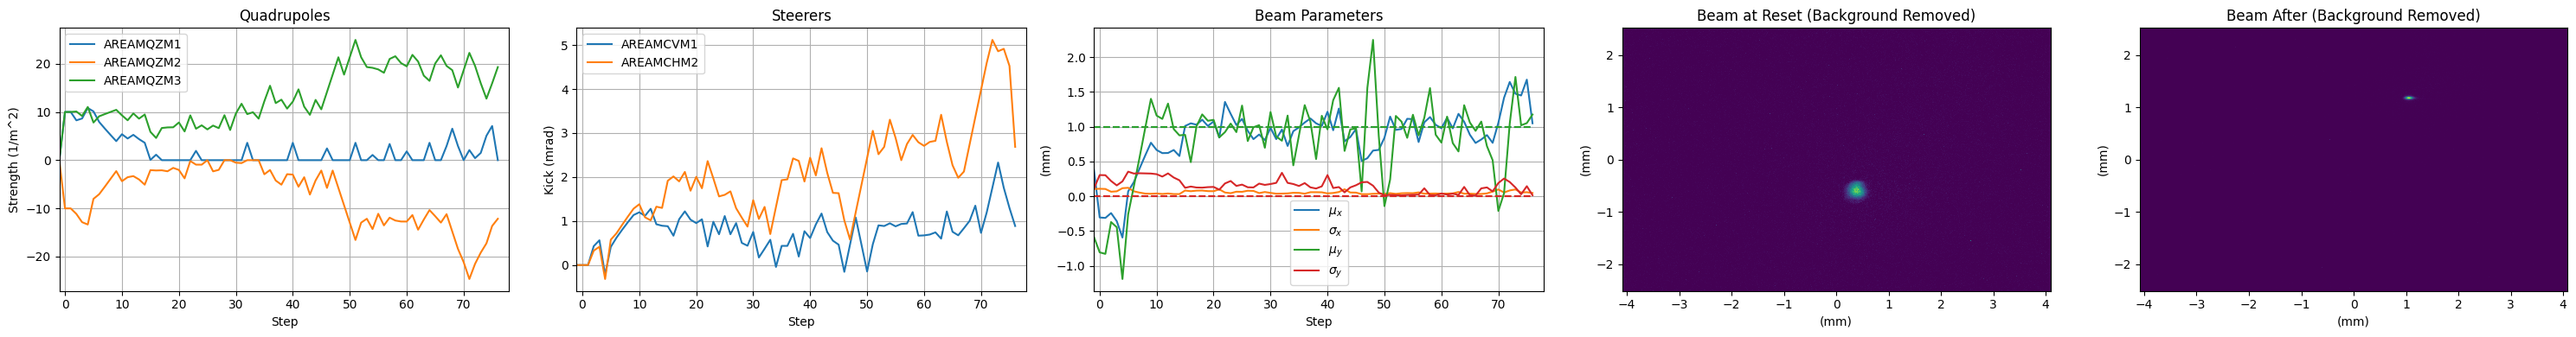

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=75,
    model_name="Bayesian Optimisation",
    logbook=True,
    data_log_dir=f"kit_shift_data/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    obj_function="logmae",
    acquisition="EI",
    init_x=None,
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [6]:
from ea_optimize import ARESEADOOCS

env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
env.reset()

{'beam': array([ 0.00046311,  0.00010573, -0.00033155,  0.00010702], dtype=float32),
 'magnets': array([-2.5818379e-11, -2.5818379e-11,  8.1280665e-14, -2.5818379e-11,
         8.1280665e-14], dtype=float32),
 'target': array([-0.00157921,  0.0019921 , -0.00019034,  0.00101278], dtype=float32)}

/home/kaiserja/.conda/envs/rl39ng/lib/python3.9/site-packages/stable_baselines3/common/save_util.py:166: UserWarning: Could not deserialize object lr_schedule. Consider using `custom_objects` argument to replace this object.
  warnings.warn(
100%|██████████| 50/50 [07:25<00:00,  8.91s/it]


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2022-09-29 18:53:22.163163\nTime taken: 0:07:31.159152\nNo. of steps: 50\n\nBeam before:\n    mu_x    =  0.4664 mm\n    sigma_x =  0.1057 mm\n    mu_y    = -0.3352 mm\n    sigma_y =  0.1081 mm\n\nBeam after:\n    mu_x    =  0.9478 mm\n    sigma_x =  0.0381 mm\n    mu_y    =  1.0620 mm\n    sigma_y =  0.1143 mm\n\nTarget beam:\n    mu_x    =  1.0000 mm    (e = 0.0033 mm) :/\n    sigma_x =  0.0000 mm    (e = 0.0033 mm) :/\n    mu_y    =  1.0000 mm    (e = 0.0033 mm) :/\n    sigma_y =  0.0000 mm    (e = 0.0033 mm) :/\n\nFinal magnet settings:\n    AREAMQZM1 strength =   6.1293 1/m^2\n    AREAMQZM2 strength = -14.4510 1/m^2\n    AREAMCVM1 kick     =   1.2938 mrad\n    AREAMQZM3 strength =  16.7467 1/m^2\n    AREAMCHM1 kick     =   2.8928 mrad\n    '


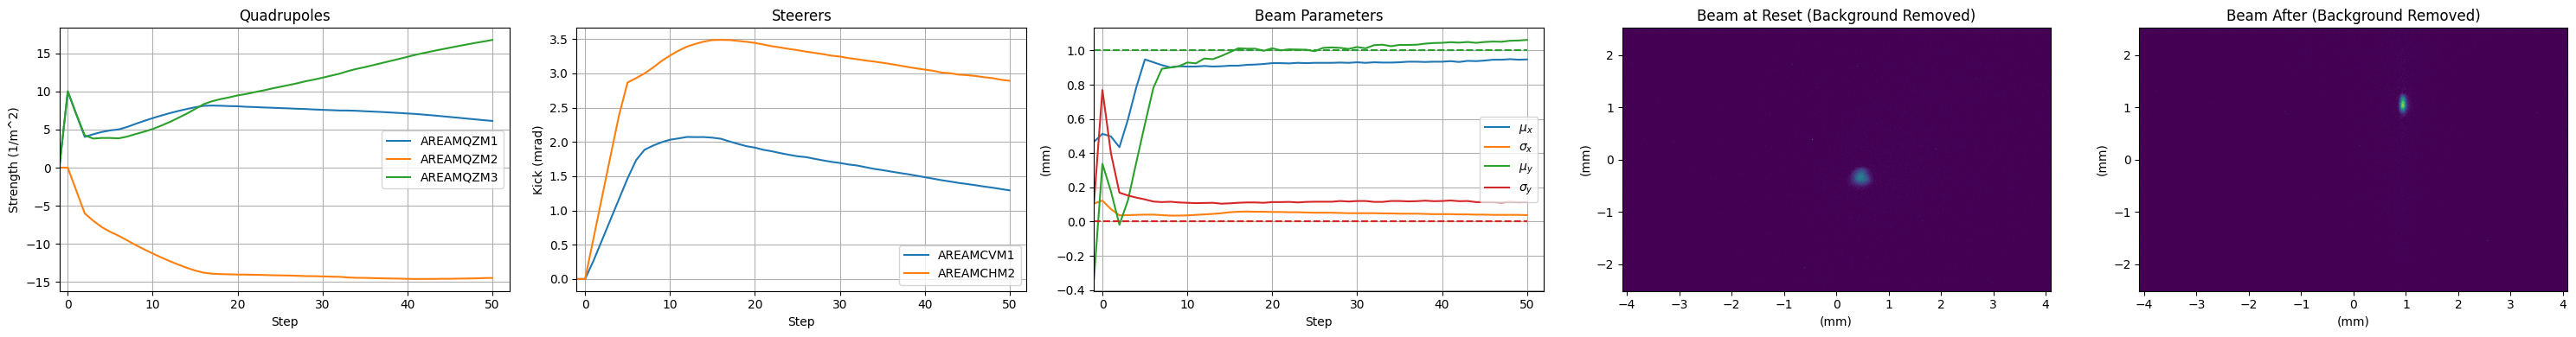

In [7]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=50,
    model_name="polished-donkey-996",
    logbook=True,
    data_log_dir=f"kit_shift_data/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)
